In [1]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# load dataset
df = pd.read_csv("../data/Train.csv")

In [3]:
df2 = pd.read_csv("../data/Train.csv")

In [4]:
# give us number of rows and columns
df.shape

(10999, 12)

In [5]:
# looking what all types of data prasent in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


<b>we see that there are some non integers which might cause problem in training model. we shall dealin data cleaning part</b>

In [6]:
# give us basic statistical insight our columns
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


<b> in some columns there is much diffrence between minimum value and maximum value . we shall use some normalize in data </b>

In [7]:
# checking null value in dataset
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

<b> there are no null value in dataset </b>

### Exploratory Data Analysis

In [8]:
objects = df.select_dtypes(include="object")
float1 = df.select_dtypes(exclude="object")

Text(0.5, 1.0, 'Count of reached on time')

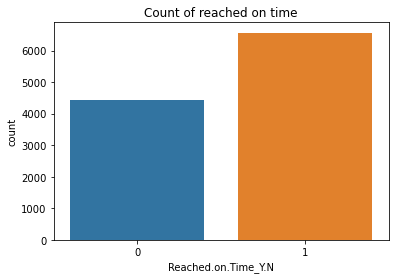

In [9]:
# check imbalance dataset
sns.countplot(x = "Reached.on.Time_Y.N", data=df)
plt.title("Count of reached on time")

dataset split between 40% and 60%. for imbalanced dataset we can use up sampling or down sampling

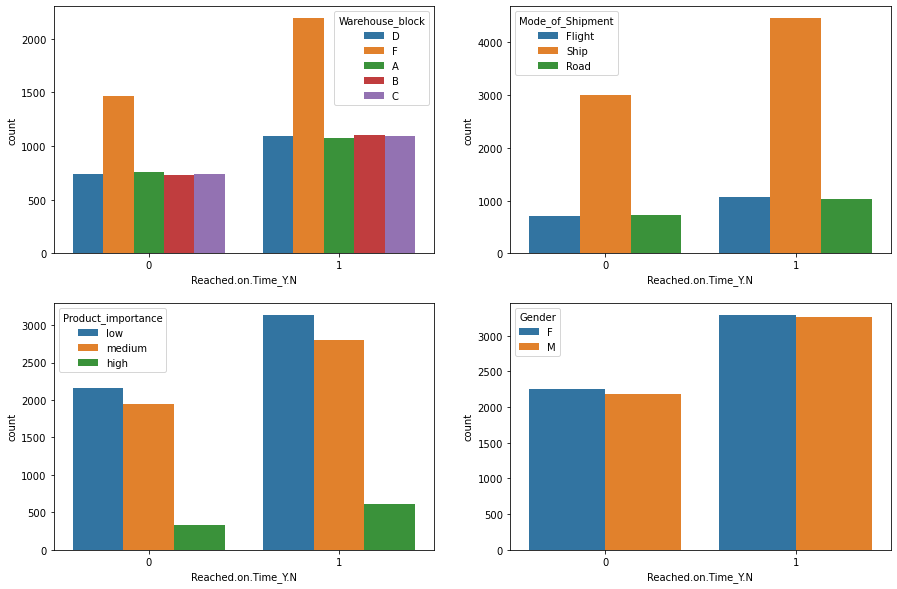

In [10]:
i = 1
plt.figure(figsize = (15, 10))
for col in objects:
    plt.subplot(2, 2, i)
    sns.countplot(x="Reached.on.Time_Y.N", hue=df[col], data=df)
    i += 1

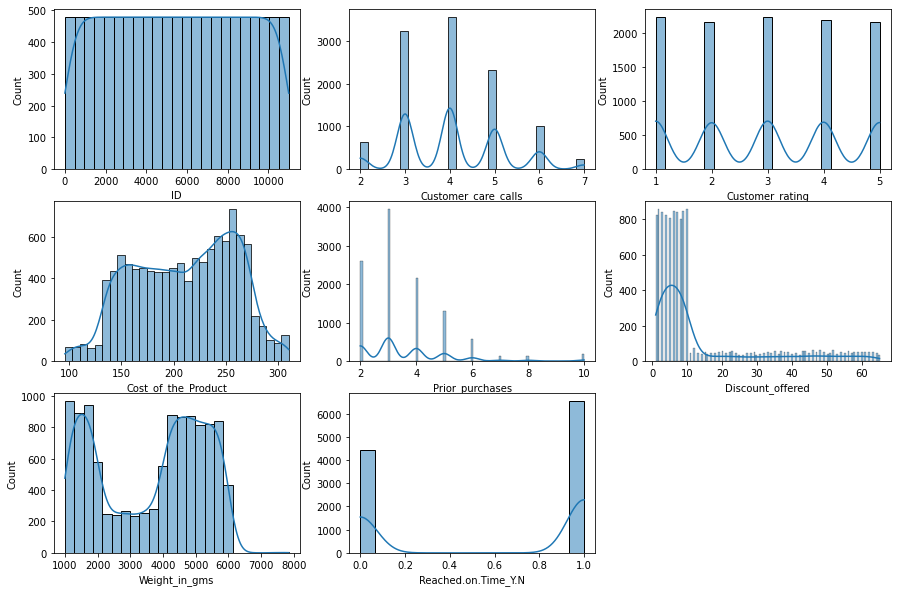

In [11]:
i = 1
plt.figure(figsize = (15, 10))
for col in float1:
    plt.subplot(3, 3, i)
    sns.histplot(x = df[col], kde=True)
    i += 1

checking distribution of numeric columns

<b> checking custormer rating? and was the product reached on time </b>

In [12]:
cust = df.groupby("Customer_rating")["Reached.on.Time_Y.N"].mean().to_frame()
cust

,Reached.on.Time_Y.N
Customer_rating,
1,0.587472
2,0.587991
3,0.606074
4,0.595249
5,0.606633


customer rating does not have strong correlation with product reach on time

<b>is customer query being answered?</b>

In [13]:
custq = df.groupby("Customer_care_calls")["Reached.on.Time_Y.N"].mean().to_frame()
custq

,Reached.on.Time_Y.N
Customer_care_calls,
2,0.652038
3,0.625117
4,0.597695
5,0.584192
6,0.516288
7,0.516260


if shipment don't arrive on time customer call increase

<b> is Product_importance metter on product reach on time</b>


In [14]:
product_importance = df.groupby("Product_importance")['Reached.on.Time_Y.N'].mean().to_frame()
product_importance

,Reached.on.Time_Y.N
Product_importance,
high,0.649789
low,0.592788
medium,0.590450


high importance product reach more on time compare to low and medium importance product

<b> is product importance related to customer rating</b>

In [15]:
cust_r = df.groupby("Product_importance")['Customer_rating'].mean().to_frame()
cust_r

,Customer_rating
Product_importance,
high,2.993671
low,2.983576
medium,2.997686


it has no relation

<b> is Cost_of_the_Product matter on product reach on time</b>


In [16]:
cost = df.groupby("Cost_of_the_Product")['Reached.on.Time_Y.N'].mean().to_frame()
cost

,Reached.on.Time_Y.N
Cost_of_the_Product,
96,1.000000
97,0.571429
98,0.642857
99,0.200000
100,0.444444
...,...
306,0.500000
307,0.357143
308,0.450000


there are no relation

<b> checking outliers in numeric columns </b>

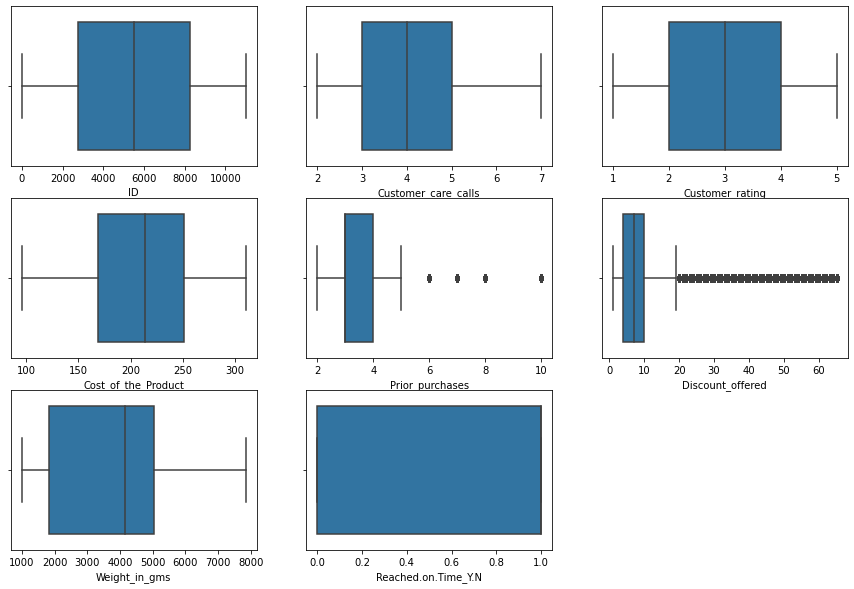

In [17]:
i = 1
plt.figure(figsize = (15, 10))
for col in float1:
    plt.subplot(3, 3, i)
    sns.boxplot(x = df[col])
    i += 1

Discount_offered has much more outliers. and prior_purchases hase some outliers

<b> for outlier treatment we use log transformation</b>

In [18]:
prior_ = df['Prior_purchases']
discount = df['Discount_offered']

In [19]:
# create log transformation
df['Prior_purchases'] = np.log(df['Prior_purchases'])
df['Discount_offered'] = np.log(df['Discount_offered'])

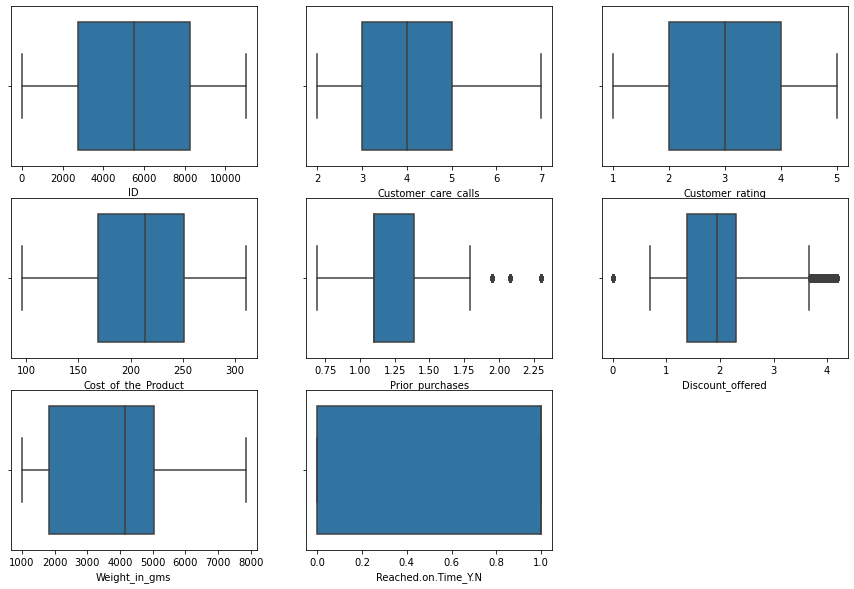

In [20]:

i = 1
plt.figure(figsize = (15, 10))
for col in float1:
    plt.subplot(3, 3, i)
    sns.boxplot(x = df[col])
    i += 1

we can see that the outliers has been reduced

<b>COnvert categorical features into numeric </b>

In [184]:
encoders = {}
for col in objects:
        le = LabelEncoder().fit(df[col])
        df[col] = le.transform(df[col])
        encoders[col] = le

In [69]:
l3 = LabelEncoder()

In [4]:
aa = ['a', 'b', 'c']
bb = ['b', 'd', 'e']
df3 = pd.DataFrame([aa, bb], columns=['aa', 'bb', 'cc'])
df3

,aa,bb,cc
0,a,b,c
1,b,d,e


In [6]:
df3 = pd.get_dummies(df3)
df3

,aa_a,aa_b,bb_b,bb_d,cc_c,cc_e
0,1,0,1,0,1,0
1,0,1,0,1,0,1


In [7]:
aaa = ['a', 'b', 'e']
aaa = pd.get_dummies(aaa)

In [8]:
aaa

,a,b,e
0,1,0,0
1,0,1,0
2,0,0,1


In [ ]:
# Categorical variable encoding
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns
transform_features = ["avg_glucose_level", "bmi"]

num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
]
)

cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder()),
    ('scaler', StandardScaler(with_mean=False))
]
)

transform_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('transformer', PowerTransformer())
])

preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_features),
    ('cat_pipeline', cat_pipeline, cat_features),
    ('power_transformer', transform_pipe, transform_features)
])





In [ ]:
X = preprocessor.fit_transform(X)

In [ ]:
# in input data from flask give input_data=preprocessor.transform(input_data)

In [ ]:
ID                          1
Warehouse_block             D
Mode_of_Shipment       Flight
Customer_care_calls         4
Customer_rating             2
Cost_of_the_Product       177
Prior_purchases             3
Product_importance        low
Gender                      F
Discount_offered           44
Weight_in_gms            1233
Reached.on.Time_Y.N         1

In [88]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [31]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,0,3,0,2,1,81,1,1,0,43,228,1
1,1,4,0,2,4,120,0,1,1,58,1595,1
2,2,0,0,0,1,87,2,1,1,47,1754,1
3,3,1,0,1,2,80,2,2,1,9,173,1
4,4,2,0,0,1,88,1,2,0,45,1249,1


<AxesSubplot:>

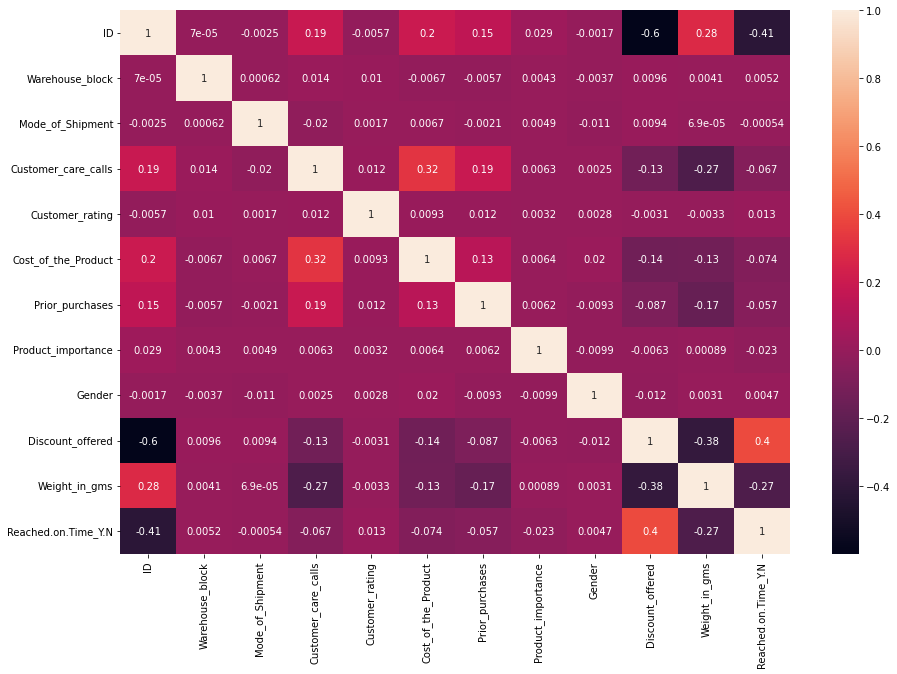

In [40]:
# checking correlation of data
plt.figure(figsize=(15,10))
corr = df.corr()
sns.heatmap(corr, annot=True) # fmt="g"

### Base model

In [43]:
# splitting data into x and y
x = df.drop("Reached.on.Time_Y.N", axis=1)
y = df["Reached.on.Time_Y.N"]

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=33, test_size=0.3)

In [45]:
# data normalize with standard scaler
standard = StandardScaler()
standard.fit(x_train, y_train)
x_train = standard.transform(x_train)
x_test = standard.transform(x_test)

In [47]:
x_train.shape

(7699, 11)

In [56]:
x_train

array([[ 1.40046565, -0.90488817,  0.64120875, ...,  1.00560083,
        -0.69437231, -1.05233945],
       [ 0.50785105,  1.11211647,  0.64120875, ...,  1.00560083,
        -0.38087335, -1.3983366 ],
       [-1.50005736,  1.11211647,  0.64120875, ...,  1.00560083,
        -0.50627293, -0.65691415],
       ...,
       [ 0.09886781, -0.23255329,  0.64120875, ...,  1.00560083,
        -0.38087335,  0.90128844],
       [-0.97941823, -0.90488817, -0.67840263, ...,  1.00560083,
         1.81361939, -1.47693548],
       [ 0.52271741,  0.43978159,  0.64120875, ...,  1.00560083,
        -0.7570721 , -1.27598164]])

In [52]:
def stacking_model():
    # define base model
    level0 = []
    level0.append(('CART', DecisionTreeClassifier(max_depth=4, min_samples_leaf=1)))
    level0.append(('AB', AdaBoostClassifier(learning_rate=0.01, n_estimators=100)))
    level0.append(('GBC', GradientBoostingClassifier(learning_rate=0.01, n_estimators=200)))
    
    #Define final model
    level1 = AdaBoostClassifier(learning_rate=0.01, n_estimators=100)
    # define stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5, )
    return model

In [53]:
# training model
final_model = stacking_model()
final_model.fit(x_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('CART', DecisionTreeClassifier(max_depth=4)),
                               ('AB',
                                AdaBoostClassifier(learning_rate=0.01,
                                                   n_estimators=100)),
                               ('GBC',
                                GradientBoostingClassifier(learning_rate=0.01,
                                                           n_estimators=200))],
                   final_estimator=AdaBoostClassifier(learning_rate=0.01,
                                                      n_estimators=100))

In [55]:
# prediction 
y_pred = final_model.predict(x_test)

# confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

# classification report
classi = classification_report(y_test, y_pred)
print(classi)

[[1303    2]
 [ 984 1011]]
              precision    recall  f1-score   support

           0       0.57      1.00      0.73      1305
           1       1.00      0.51      0.67      1995

    accuracy                           0.70      3300
   macro avg       0.78      0.75      0.70      3300
weighted avg       0.83      0.70      0.69      3300

